<a href="https://colab.research.google.com/github/Nallin-kumar/ML_Algos/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

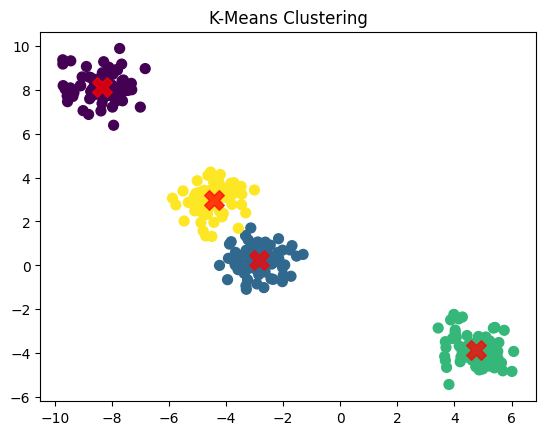

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Create sample data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60)

# Train KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering")
plt.show()


**Elbow** **method**

In [2]:
# ✅ Step 1: Install kneed
!pip install kneed


In [3]:
# ✅ Step 2: Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from kneed import KneeLocator


In [4]:
# ✅ Step 3: Create synthetic dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)


In [5]:
# ✅ Step 4: Calculate WCSS for a range of K
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


In [6]:
# ✅ Step 5: Use KneeLocator to automatically find the elbow
kl = KneeLocator(K_range, wcss, curve="convex", direction="decreasing")
optimal_k = kl.elbow
print(f"✅ Optimal number of clusters (K) is: {optimal_k}")


✅ Optimal number of clusters (K) is: 4


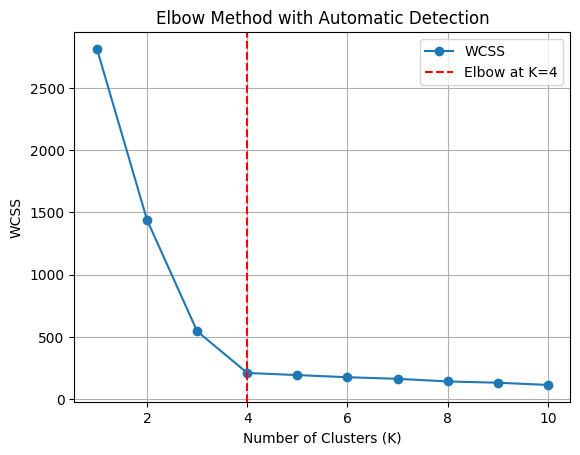

In [7]:
# ✅ Step 6: Plot Elbow Graph with the elbow point marked
plt.plot(K_range, wcss, marker='o', label='WCSS')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Elbow at K={optimal_k}')
plt.title('Elbow Method with Automatic Detection')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()
